Diabetes prediction 

In [116]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import joblib




In [117]:

df=pd.read_csv("/Users/Apple/Desktop/mahcine_project/diabetes_prediction_dataset 3.csv")


df.head(5)

df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [118]:

df.shape
df.info()
df.columns
df.describe()

df.isnull().sum()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  99981 non-null   float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                  0
age                    19
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [119]:

df.isnull().sum()

df['age'].fillna(df['age'].median(), inplace=True)

df.isnull().sum()

/var/folders/02/dbvsph7n2t12zchfqz_3j96c0000gn/T/ipykernel_2036/3336037713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

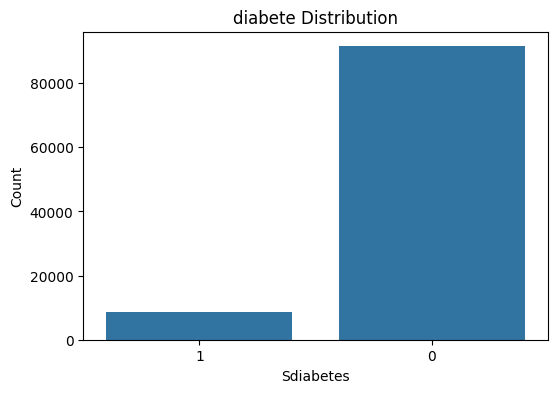

In [120]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diabetes', order=[1,0])
plt.title('diabete Distribution')
plt.xlabel('Sdiabetes')
plt.ylabel('Count')
plt.show()


In [121]:

df.duplicated().sum()

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [122]:


Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['age']>= lower_bound)&(df['age']<=upper_bound)]


In [123]:


df['age']=df['age'].astype(int)

df['blood_glucose_level'] = df['blood_glucose_level'].astype(float)


In [124]:



label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])


df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)


In [125]:
df.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80,0,1,25.19,6.6,140.0,0,False,False,False,True,False
1,0,54,0,0,27.32,6.6,80.0,0,False,False,False,False,False
2,1,28,0,0,27.32,5.7,158.0,0,False,False,False,True,False
3,0,36,0,0,23.45,5.0,155.0,0,True,False,False,False,False
4,1,76,1,1,20.14,4.8,155.0,0,True,False,False,False,False


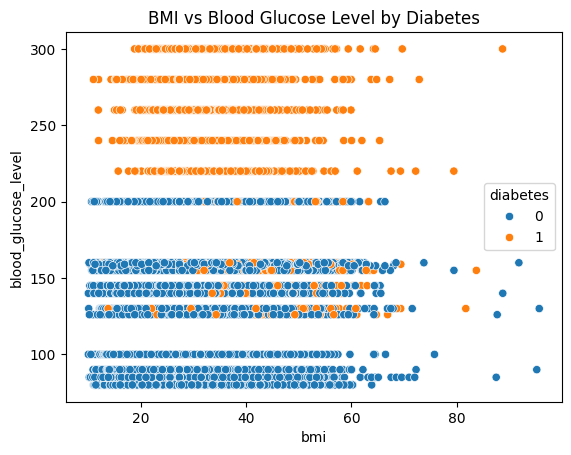

In [126]:
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=df)
plt.title('BMI vs Blood Glucose Level by Diabetes')
plt.show()

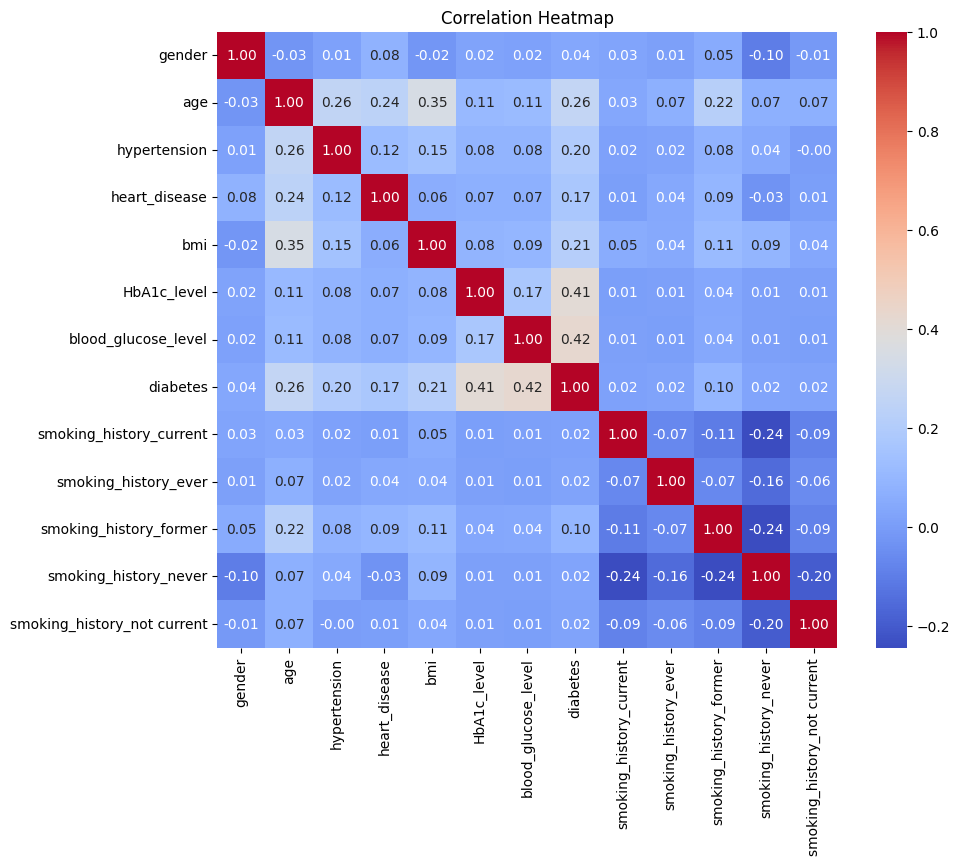

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [128]:
df["glucose_bmi_ratio"] = df["blood_glucose_level"] / df["bmi"]
df["age_hba1c"] = df["age"] * df["HbA1c_level"]
df["bmi_age_interaction"] = df["bmi"] * df["age"]
df["hba1c_glucose_ratio"] = df["HbA1c_level"] / (df["blood_glucose_level"] + 1e-6)
df["risk_score"] = df["HbA1c_level"] * df["blood_glucose_level"] * df["age"] / 1000


In [129]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print(X.shape)  
print(y.shape)


(96146, 17)
(96146,)


In [130]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.head(5))
print(y_train.head(5))
print(X_test.head(5))
print(y_test.head(5))

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
79000       1   45             0              0  23.87          5.7   
32014       0   60             0              0  28.97          6.6   
95559       0   45             0              0  27.32          6.6   
32058       0   48             0              0  27.32          5.0   
97797       0   27             0              0  26.48          6.5   

       blood_glucose_level  smoking_history_current  smoking_history_ever  \
79000                126.0                    False                 False   
32014                158.0                    False                  True   
95559                126.0                    False                 False   
32058                 90.0                    False                 False   
97797                200.0                    False                 False   

       smoking_history_former  smoking_history_never  \
79000                   False                  False  

In [131]:


numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

pipeline = Pipeline([
    ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
    ("model", DecisionTreeClassifier(
    criterion="gini",     
    max_depth=6,         
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
    ))
])


In [132]:

pipeline.fit(X_train, y_train) 

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42, sampling_strategy=0.5)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

In [ ]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

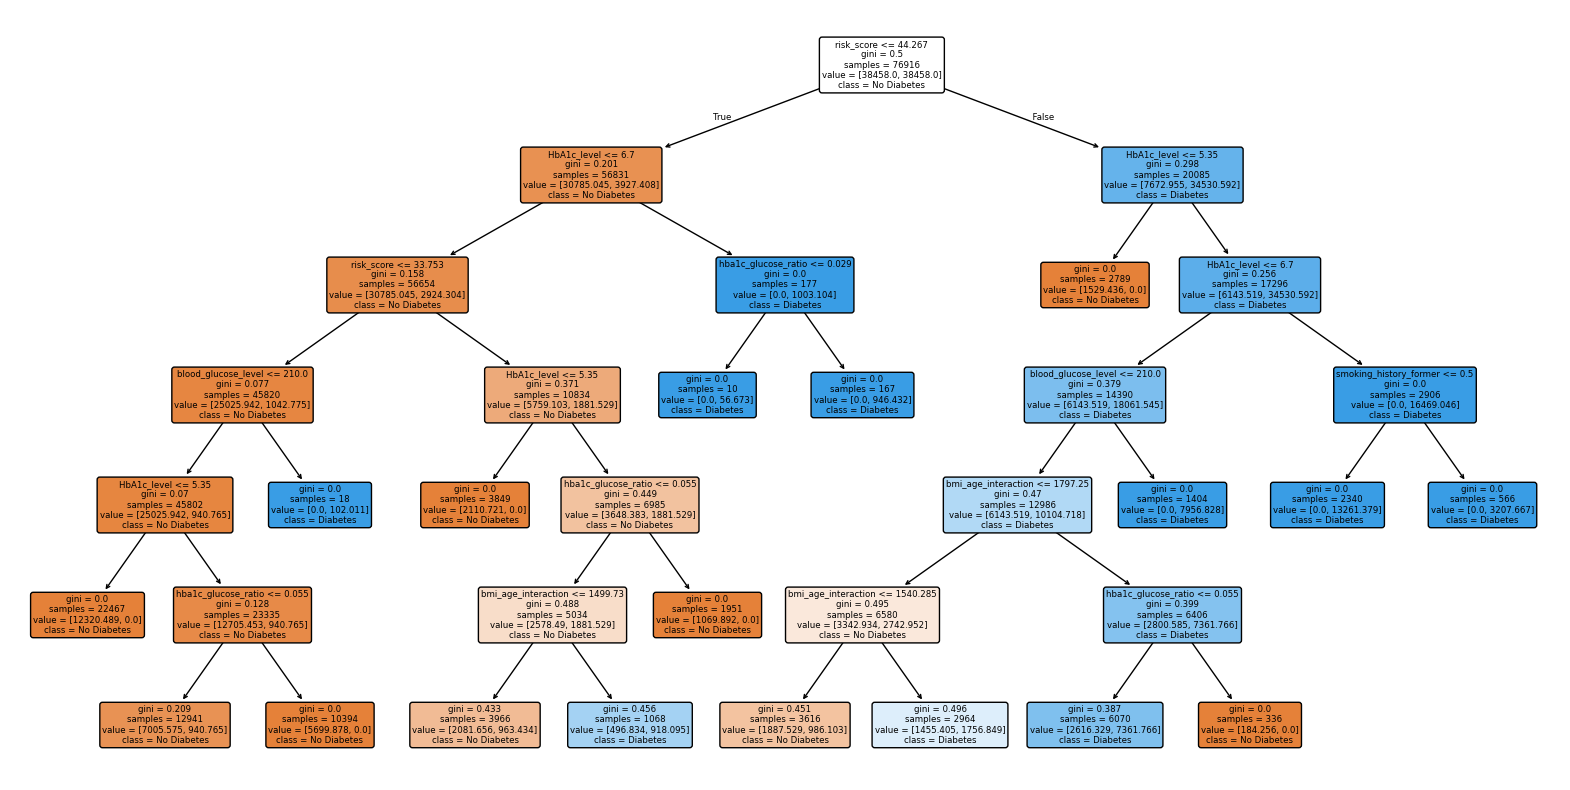

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    pipeline.named_steps["model"],   # or tree_model
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17534
           1       0.42      0.91      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.70      0.90      0.75     19230
weighted avg       0.94      0.88      0.90     19230



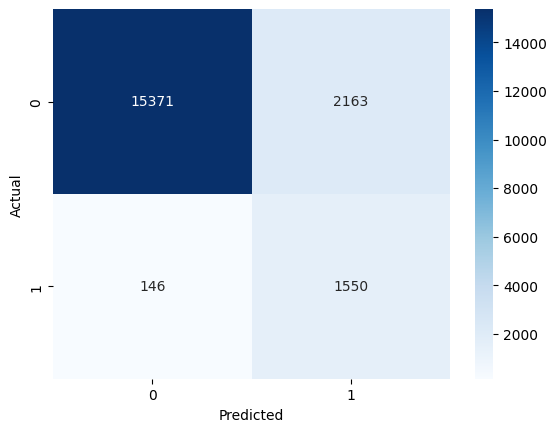

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC:{ roc_auc*100:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy prediction : % {accuracy*100:.2f}")

ROC-AUC:96.76
Accuracy prediction : % 87.99


In [ ]:
joblib.dump(pipeline, "diabetes_decision_tree.pkl")

['diabetes_decision_tree.pkl']